# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [5]:
kill.gender.value_counts().index

Index(['M', 'F'], dtype='object')

In [7]:
kill.gender.value_counts().values

array([2428,  107], dtype=int64)

In [10]:
ax.patches

<Axes.ArtistList of 2 patches>

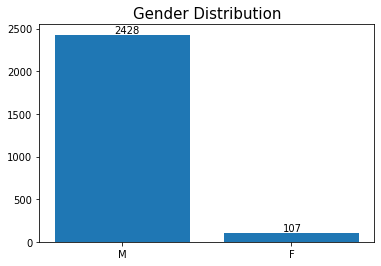

In [22]:
# hoca
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values )
ax.set_title('Gender Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35,p.get_height()+20 ))

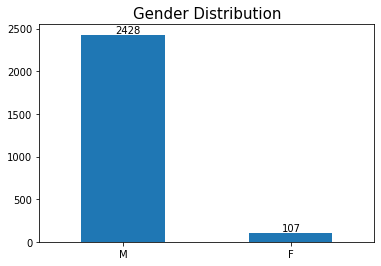

In [32]:
# pandas ile cözümü
fig, ax = plt.subplots()
# ax.bar(kill.gender.value_counts().index, kill.gender.value_counts().values )
kill.gender.value_counts().plot(kind='bar',ax = ax, rot=0) # m l  yi düz yaziyor
ax.set_title('Gender Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2,p.get_height()+20 ))

In [49]:
gender_count = kill.groupby('gender')['id'].count()
gender_count

gender
F     107
M    2428
Name: id, dtype: int64

In [48]:
gender_type= kill['gender'].unique()
gender_type

array(['M', 'F'], dtype=object)

In [53]:
gender_count = kill['gender'].value_counts()
gender_count

M    2428
F     107
Name: gender, dtype: int64

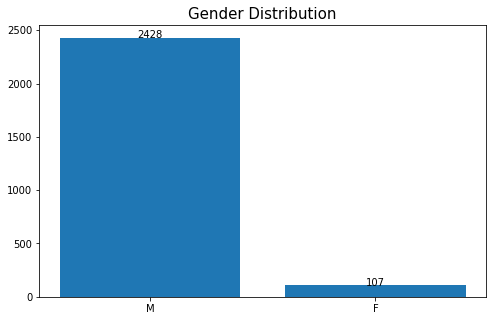

In [107]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
plt.bar(gender_type, gender_count);
plt.title("Gender Distribution", fontsize=15)
for index, value in enumerate(gender_count):
    plt.text(index, value, str(value), ha = "center")
    
plt.show()


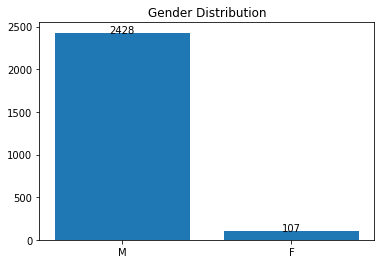

In [113]:
# with matplotlib

fig, ax = plt.subplots()
ax.bar(gender_type,gender_count)
ax.set_title('Gender Distribution')
for index, value in enumerate(gender_count):
    plt.text(index, value, str(value), ha = "center")
plt.show()

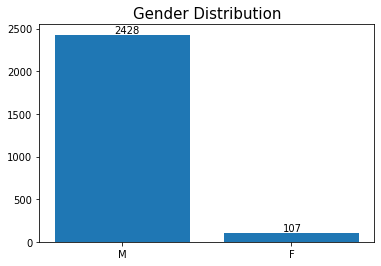

In [ ]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [33]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [36]:
kill.armed.value_counts()[:7]

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [37]:
kill.armed.value_counts(dropna=False)[:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

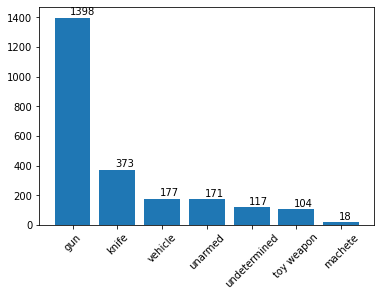

In [46]:
fig, ax = plt.subplots()
ax.bar(kill.armed.value_counts()[0:7].index, kill.armed.value_counts()[0:7].values )
# ax.set_title('Killed Armed', fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35,p.get_height()+20 ))
# plt.xticks(kill.armed.value_counts()[0:7].index,rotation=30)
ax.set_xticklabels(kill.armed.value_counts()[0:7].index, rotation=45);

AttributeError: 'Index' object has no attribute 'plot'

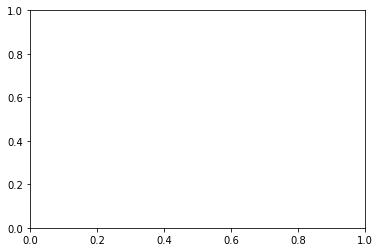

In [51]:
# hoca degiskenleri ayarla
fig, ax = plt.subplots()
common_weapons.plot(kind='bar', ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+12));
;

In [57]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [60]:
y = kill['armed'].value_counts().index
x=  kill['armed'].value_counts().values

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [147]:
x = kill['armed'].value_counts().head(7).index
y=  kill['armed'].value_counts().head(7).values
print(x,y)

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object') [1398  373  177  171  117  104   18]


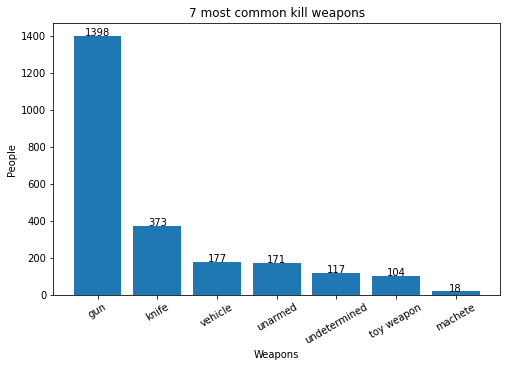

In [157]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x,y )
for index, value in enumerate(kill['armed'].value_counts().head(7)):
    plt.text(index, value, str(value), ha = "center")
plt.xticks(x,rotation=30)
ax.set_label=y
ax.set_xlabel('Weapons')
ax.set_ylabel('People')
ax.set_title('7 most common kill weapons');

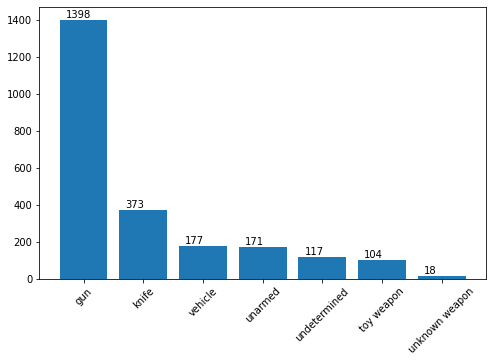

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [52]:
# hoca
kill.age.value_counts(dropna=False)

25.0    103
36.0     91
31.0     85
24.0     83
29.0     83
       ... 
80.0      1
14.0      1
13.0      1
91.0      1
79.0      1
Name: age, Length: 74, dtype: int64

In [54]:
kill['age_cat'] = kill.age.apply(lambda x : 'above25' if x>= 25 else ('below25' if x <25 else 'others'))
kill['age_cat']

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531     others
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [57]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
 14  age_cat                 

In [55]:
kill['age_cat'].value_counts()

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

In [58]:
kill.sample()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
224,247,Scott Dunham,24/03/15,shot,gun,57.0,M,W,San Jose,CA,True,attack,Not fleeing,False,above25


In [60]:
age_class= kill['age_cat'].value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

In [62]:
fig, ax = plt.ubplots()
ax.bar(age_class.index, age_class.values)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.04, p.get_height()+12));

AttributeError: module 'matplotlib.pyplot' has no attribute 'ubplots'

In [101]:
kill['age'] = kill['age'].astype(float)

In [103]:
kill[kill['age']>25.0]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [104]:
kill['age_cat'] = np.where(kill['age']> 25.0, 'above25', 'below25')

In [105]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [106]:
kill['age_cat'].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

above25    1905
below25     630
Name: age_cat, dtype: int64

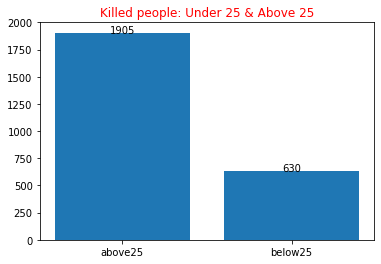

In [134]:
x= kill['age_cat'].value_counts().index
y = kill['age_cat'].value_counts().values
fig, ax = plt.subplots()
ax.bar(x,y )
ax.set_title('Killed people: Under 25 & Above 25',color='r',fontsize=12)
for index, value in enumerate(kill['age_cat'].value_counts()):
    plt.text(index, value, str(value), ha = "center")

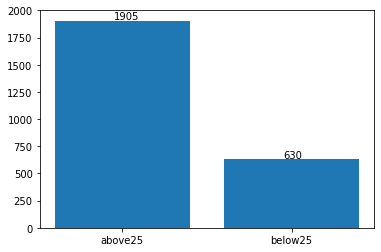

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [66]:
race_freq= kill['race'].value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

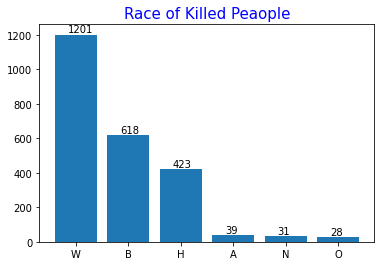

In [73]:
fig,ax = plt.subplots()
ax.bar(race_freq.index, race_freq.values)
ax.set_title('Race of Killed Peaople', color='b', fontsize =15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+12));

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

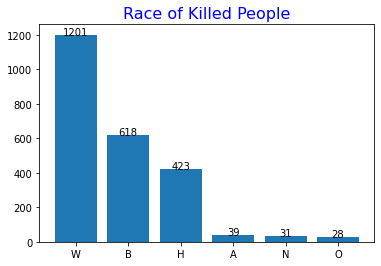

In [131]:
x= kill['race'].value_counts().index
y = kill['race'].value_counts().values
fig, ax = plt.subplots()
ax.bar(x,y )
ax.set_title('Race of Killed People',color='b',fontsize=16)
for index, value in enumerate(kill['race'].value_counts()):
    plt.text(index, value, str(value), ha = "center")

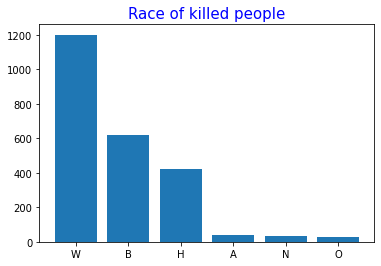

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [135]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [75]:
kill['race'].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [76]:
kill['race'].nunique(dropna=False)

7

In [136]:
kill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [139]:
kill['race'].value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [160]:
kill['race'].value_counts(dropna=False).sum()

2535

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [77]:
kill.shape

(2535, 15)

In [78]:
# hoca
kill.dropna(inplace=True)

In [79]:
kill.shape

(2254, 15)

In [175]:
kill_race = kill.dropna(subset = ['race'])

In [177]:
kill_race['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [184]:
kill_race['race'][60]

'H'

In [192]:
kill_race['race'][50:60]

50    B
51    W
52    W
53    B
54    H
55    W
56    W
57    B
58    H
60    H
Name: race, dtype: object

In [215]:
# for i in range(len(kill['race'])):
#     if i in kill_race['race'].index:
#         print(i,type(kill_race['race'][i]),":",kill_race['race'][i])
# 2340 kayit var hepsi str


In [172]:
kill.shape

(2535, 15)

In [197]:
kill_race.shape

(2340, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [80]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [83]:
labels = kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [85]:
sizes = kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28], dtype=int64)

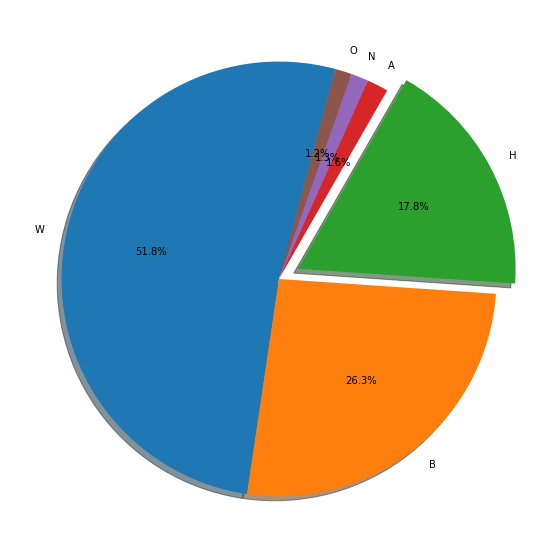

In [106]:
fig, ax = plt.subplots(figsize=(10,10))
explode = [0, 0, 0.1, 0, 0, 0]
ax.pie(x = sizes, 
        labels = labels, 
        explode=explode, 
        labeldistance = 1.1, 
        autopct ="%.1f%%",
        startangle=75,
        shadow=True,
        
        );

In [82]:
kill.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [203]:
x_labels = kill_race['race'].value_counts().index
x_labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [204]:
y = kill_race['race'].value_counts().values
y

array([1201,  618,  423,   39,   31,   28], dtype=int64)

array([1168,  592,  401,   36,   29,   28])

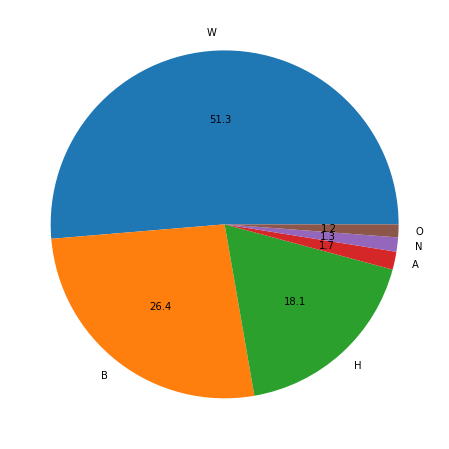

In [214]:
plt.figure(figsize=(10, 8))


plt.pie(y, labels=x_labels, labeldistance=1.1 , autopct="%.1f")
plt.show()

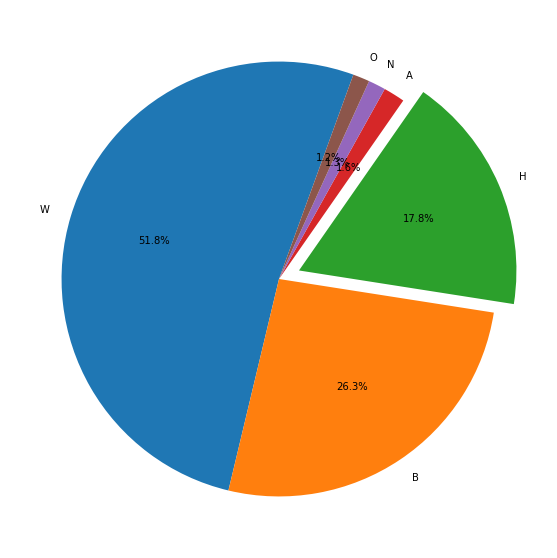

In [ ]:
# matplotlib

